# k-means++ initialization stage

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as spd
plt.rcParams['figure.figsize'] = (15.0, 12.0)

In [2]:
def plot_clusters(x, c, sizes=100):
    plt.scatter(x[:, 0], x[:, 1], s=sizes, alpha=0.7)
    if c is not None:
        plt.plot(c[:, 0], c[:, 1], 'rx', markersize=30, markeredgewidth=5)
    plt.show()

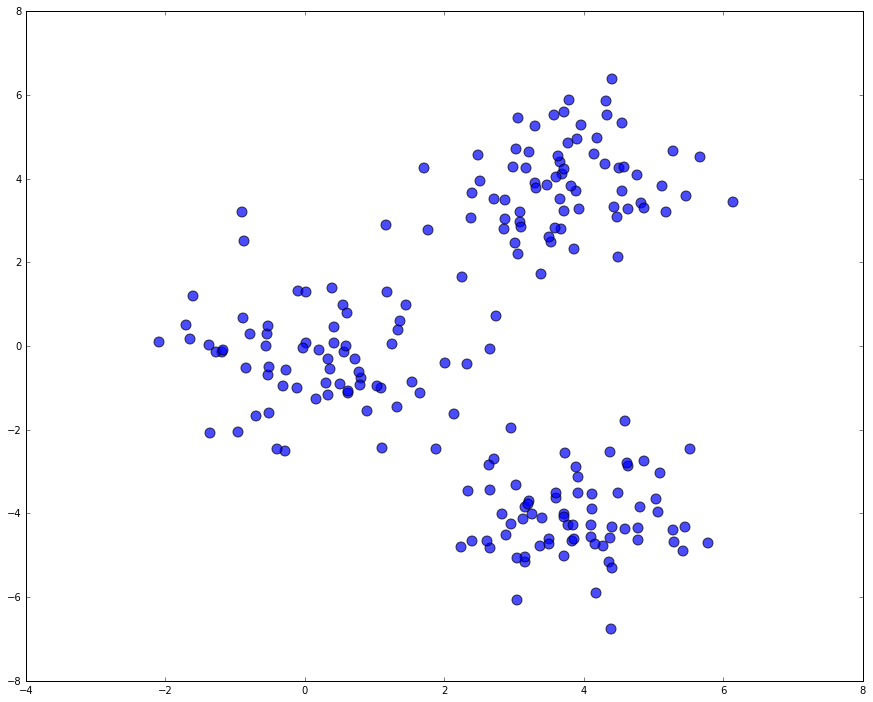

In [3]:
POINTS_PER_CLUSTER = 70
OFFSET = 4
x1 = np.random.randn(POINTS_PER_CLUSTER, 2)
x2 = (OFFSET, OFFSET) + np.random.randn(POINTS_PER_CLUSTER, 2)
x3 = (OFFSET, -OFFSET) + np.random.randn(POINTS_PER_CLUSTER, 2)
x = np.vstack((x1, x2, x3))
plot_clusters(x, None)

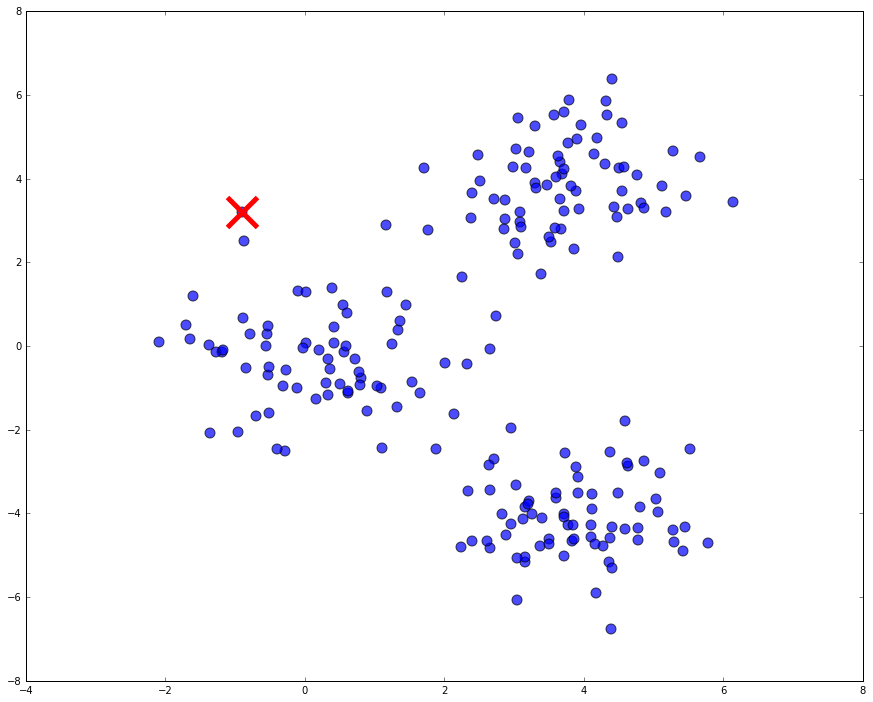

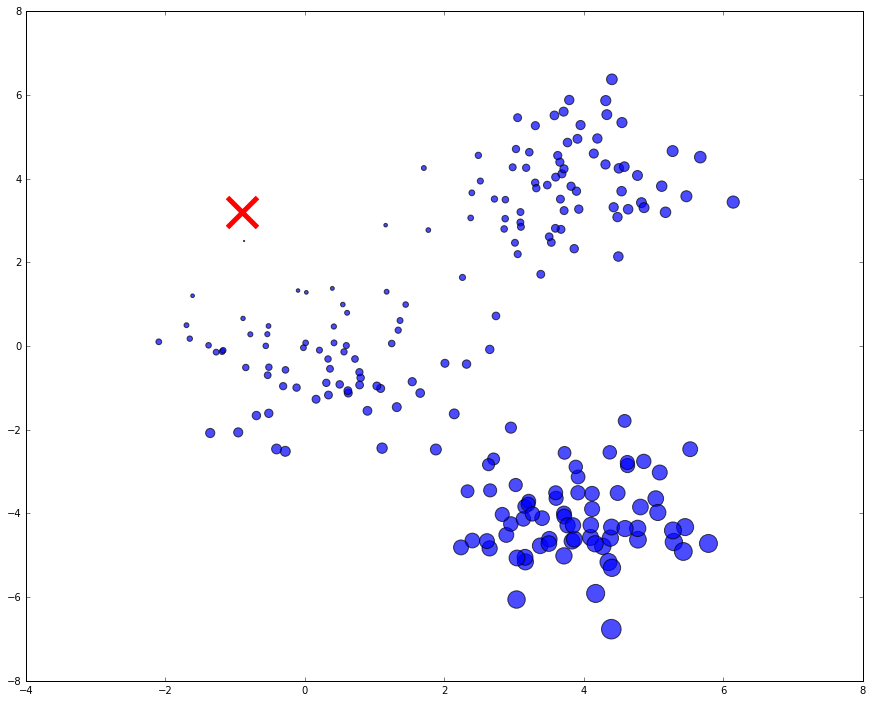

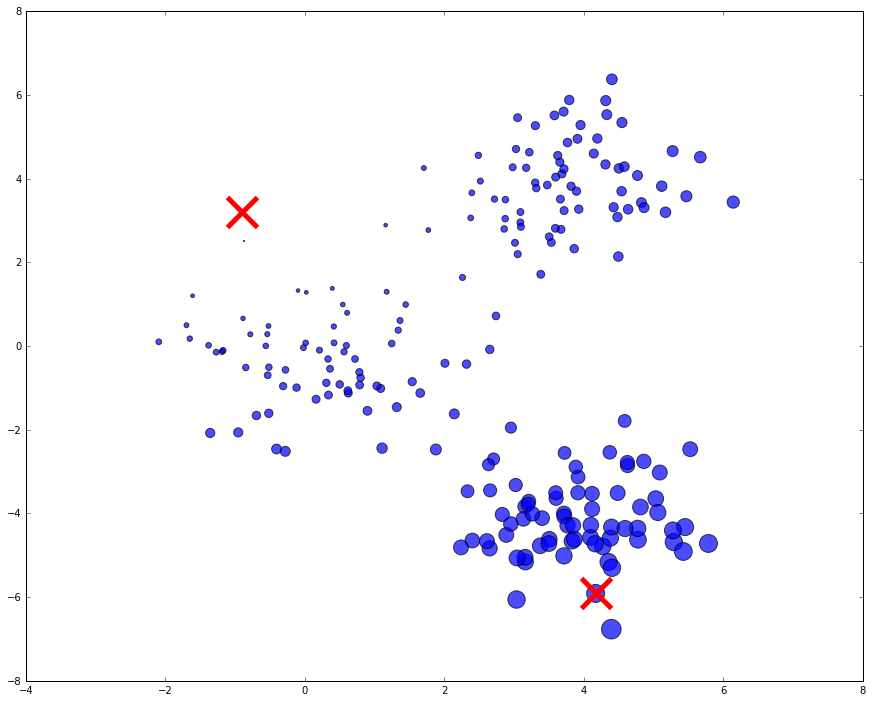

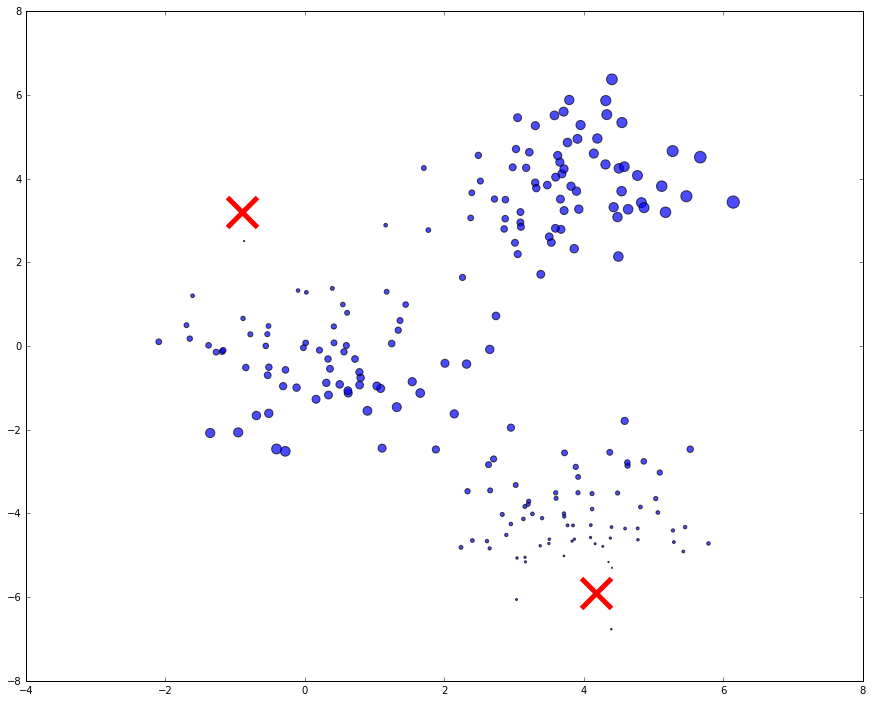

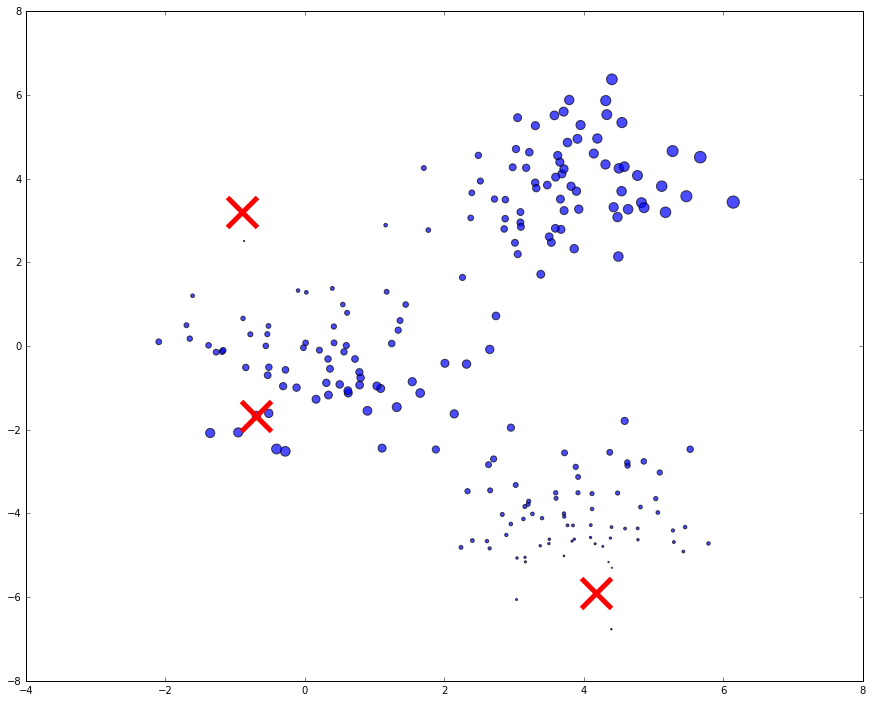

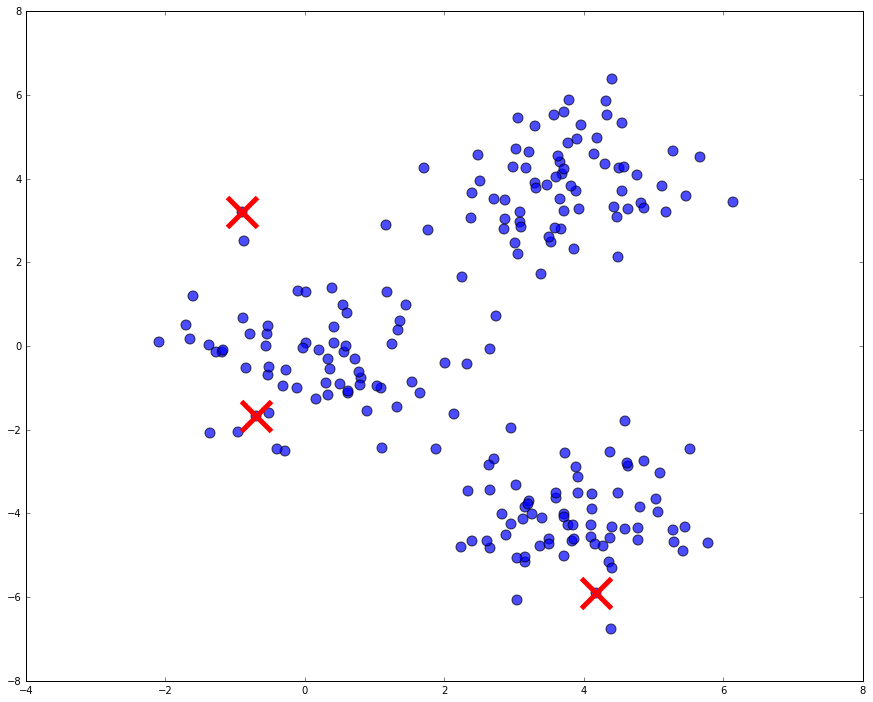

In [4]:
# Choose first center uniformly at random
c = np.array(x[np.random.choice(x.shape[0]), :], ndmin=2)
plot_clusters(x, c)

# Choose next centers weighted by squared distance
for i in range(2):
    ds = spd.cdist(c, x, 'sqeuclidean')
    mindist = np.min(ds, axis=0).flatten()
    plot_clusters(x, c, sizes=3*mindist)
    idx = np.random.choice(x.shape[0], p=mindist / np.sum(mindist))
    c = np.vstack((c, x[idx, :]))
    plot_clusters(x, c, sizes=3 * mindist)
    
plot_clusters(x, c)